# Preliminaries

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
from matplotlib import pyplot as plt
from matplotlib import cm
import msgpack

from stellarpunk import econ_sim, serialization

In [2]:
%load_ext autoreload
%autoreload 1
%aimport stellarpunk.serialization
%aimport stellarpunk.econ_sim

# Data Loading

In [3]:
#production_chain_df = pd.DataFrame(msgpack.unpackb(open("/tmp/production_chain.log", "rb").read(), object_hook=serialization.decode_matrix))
production_chain = serialization.load_production_chain(open("/tmp/production_chain.log", "rb").read())
production_chain_df = production_chain.adj_matrix

In [4]:
production_chain_df.shape

(25, 25)

In [5]:
agent_goods_df = pd.DataFrame(msgpack.unpackb(open("/tmp/agent_goods.log", "rb").read(), object_hook=serialization.decode_matrix))

In [6]:
agent_goods_df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
production_goods = agent_goods_df @ production_chain_df.T

## Loading Other Data

In [8]:
buy_price_df = econ_sim.read_tick_log_to_df(open("/tmp/buy_prices.log", "rb"), index_name="agent").reset_index()
buy_budget_df = econ_sim.read_tick_log_to_df(open("/tmp/buy_budget.log", "rb"), index_name="agent").reset_index()
sell_price_df = econ_sim.read_tick_log_to_df(open("/tmp/sell_prices.log", "rb"), index_name="agent").reset_index()
max_buy_price_df = econ_sim.read_tick_log_to_df(open("/tmp/max_buy_prices.log", "rb"), index_name="agent").reset_index()
min_sell_price_df = econ_sim.read_tick_log_to_df(open("/tmp/min_sell_prices.log", "rb"), index_name="agent").reset_index()

In [9]:
columns = ["tick", "seller", "buyer", "product", "amount", "price"]
transaction_df = pd.read_csv("/tmp/transactions.log", sep="\t", header=None, names=columns)

In [10]:
transaction_df["value"] = transaction_df["amount"] * transaction_df["price"]

# Transactions

## Market Overview

In [11]:
transaction_df.groupby("product")[["amount", "value"]].sum()

,amount,value
product,,
0,96239.0,7.777045e+05
1,70454.0,9.628313e+05
2,29840.0,1.299924e+05
3,59731.0,9.828462e+05
4,45936.0,1.534868e+05
5,96237.0,6.570047e+06
6,70452.0,1.139252e+06
7,29834.0,1.398515e+05
8,59725.0,1.093744e+06


Text(0.5, 1.0, 'transaction count by tick')

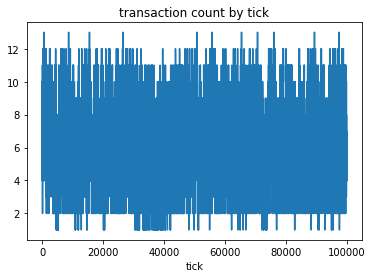

In [12]:
transaction_df.groupby("tick")["price"].count().plot()
plt.title("transaction count by tick")

Text(0.5, 1.0, 'product 0 transaction count per tick')

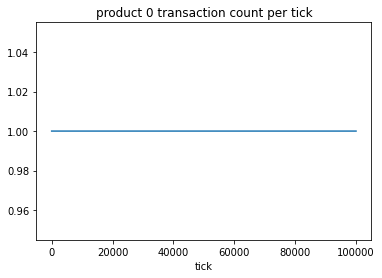

In [13]:
transaction_df[transaction_df["product"] == 0].groupby("tick")["price"].count().plot()
plt.title("product 0 transaction count per tick")

Text(0.5, 1.0, 'transaction unit quantity per tick')

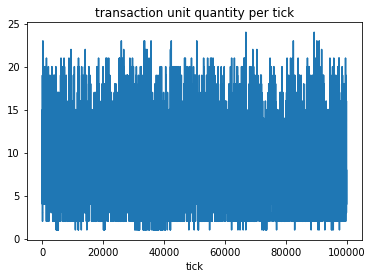

In [14]:
transaction_df.groupby("tick")["amount"].sum().plot()
plt.title("transaction unit quantity per tick")

Text(0.5, 1.0, 'transaction value per tick')

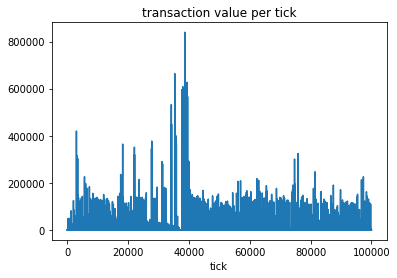

In [15]:
transaction_df.groupby("tick")["value"].sum().plot()
plt.title("transaction value per tick")

Text(0.5, 1.0, 'distinct products sold per tick')

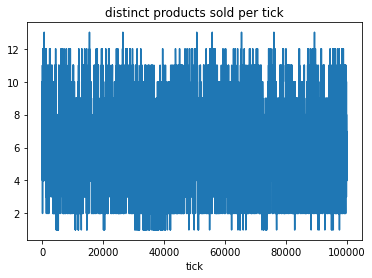

In [16]:
transaction_df.groupby("tick")["product"].nunique().plot()
plt.title("distinct products sold per tick") 

Text(0.5, 1.0, 'distinct sellers per tick')

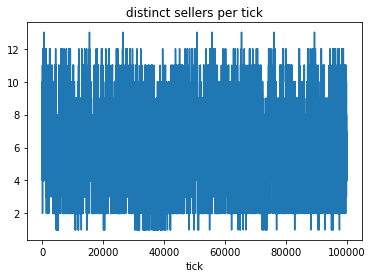

In [17]:
transaction_df.groupby("tick")["seller"].nunique().plot()
plt.title("distinct sellers per tick")

Text(0.5, 1.0, 'distinct buyers per tick')

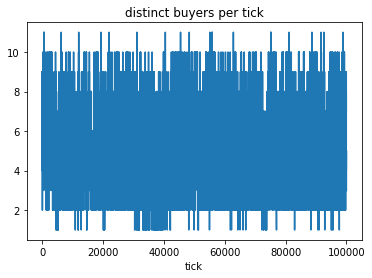

In [18]:
transaction_df.groupby("tick")["buyer"].nunique().plot()
plt.title("distinct buyers per tick")

In [19]:
transaction_df["seller"].nunique()

22

In [20]:
transaction_df["buyer"].nunique()

20

In [21]:
transaction_df["product"].nunique()

22

<AxesSubplot:>

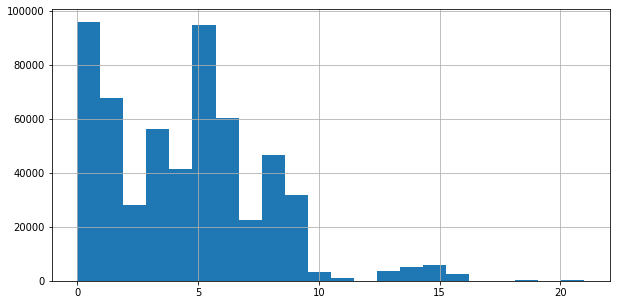

In [22]:
plt.figure(figsize=(10,5))
transaction_df["product"].hist(bins=transaction_df["product"].nunique())

Text(0.5, 1.0, 'max product id sold each tick')

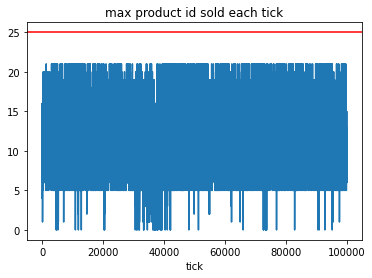

In [23]:
transaction_df.groupby("tick")["product"].max().plot()
plt.axhline(production_chain_df.shape[1], color="red")
plt.title("max product id sold each tick")

## Further Exploration

In [24]:
transaction_df[transaction_df["seller"] == 3]["price"].describe()

count    56228.000000
mean        16.461405
std          0.294600
min         16.142187
25%         16.255177
50%         16.376292
75%         16.571370
max         20.947500
Name: price, dtype: float64

Text(0.5, 1.0, 'price of product 0 over time')

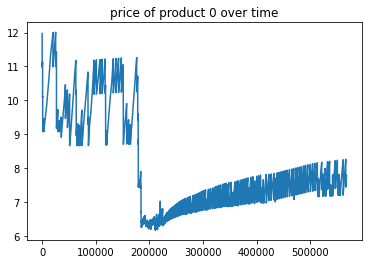

In [25]:
transaction_df[transaction_df["seller"] == 0]["price"].plot()
plt.title("price of product 0 over time")

Text(0.5, 1.0, 'price of product 2 over time')

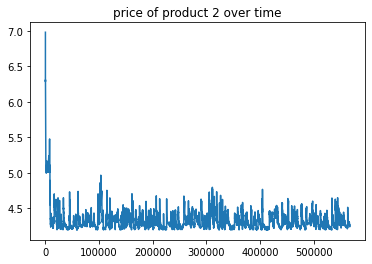

In [26]:
transaction_df[transaction_df["seller"] == 2]["price"].plot()
plt.title("price of product 2 over time")

Text(0.5, 1.0, 'price of product 6 over time')

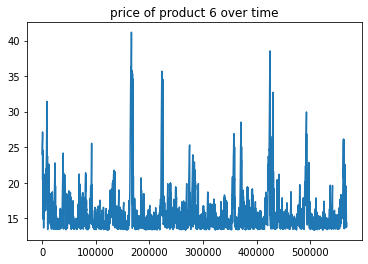

In [27]:
transaction_df[transaction_df["seller"] == 6]["price"].plot()
plt.title("price of product 6 over time")

<AxesSubplot:>

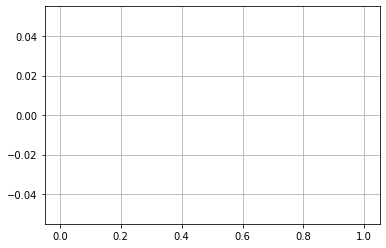

In [28]:
transaction_df[transaction_df["buyer"] == 3]["price"].hist()

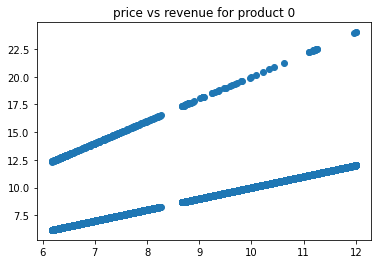

In [29]:
plt.scatter(transaction_df[transaction_df["product"] == 0].groupby("tick")["price"].mean(), transaction_df[transaction_df["product"] == 0].groupby("tick")["value"].sum())
plt.title("price vs revenue for product 0")
plt.show()

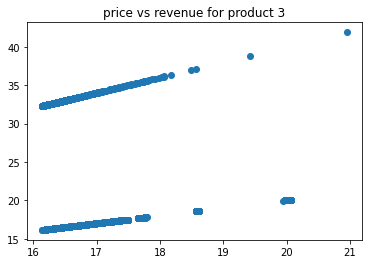

In [30]:
plt.scatter(transaction_df[transaction_df["product"] == 3].groupby("tick")["price"].mean(), transaction_df[transaction_df["product"] == 3].groupby("tick")["value"].sum())
plt.title("price vs revenue for product 3")
plt.show()

In [31]:
transaction_df[(transaction_df["price"] > 12) & (transaction_df["product"] == 0)]

,tick,seller,buyer,product,amount,price,value
20183,2762,0,5,0,2.0,12.000357,24.000714
25100,3574,0,5,0,1.0,12.000299,12.000299
25104,3575,0,5,0,1.0,12.001549,12.001549
25107,3576,0,5,0,1.0,12.002799,12.002799
25110,3577,0,5,0,1.0,12.004049,12.004049
25113,3578,0,5,0,1.0,12.005299,12.005299
25117,3579,0,5,0,1.0,12.006549,12.006549
25121,3581,0,5,0,2.0,12.007794,24.015589


## Transaction Graph

In [32]:
transaction_df.groupby(["buyer", "seller"])["amount"].sum().to_frame().reset_index()

,buyer,seller,amount
0,5,0,96239.0
1,6,1,70454.0
2,7,2,29840.0
3,8,3,59731.0
4,9,4,45936.0
5,10,6,13260.0
6,10,7,29834.0
7,10,8,9942.0
8,10,9,23205.0
9,11,8,9541.0


In [33]:
G = nx.from_pandas_edgelist(
    transaction_df.groupby(["buyer", "seller"])["amount"].sum().to_frame().reset_index(),
    source="seller", target="buyer", edge_attr="amount", create_using=nx.DiGraph)

In [34]:
labels = pd.DataFrame(transaction_df.groupby("seller")["product"].first()).apply(lambda x: f'{x.name}:{x["product"]}', axis=1)

In [35]:
G = nx.relabel_nodes(G, labels)

In [36]:
nx.is_directed_acyclic_graph(G)

True

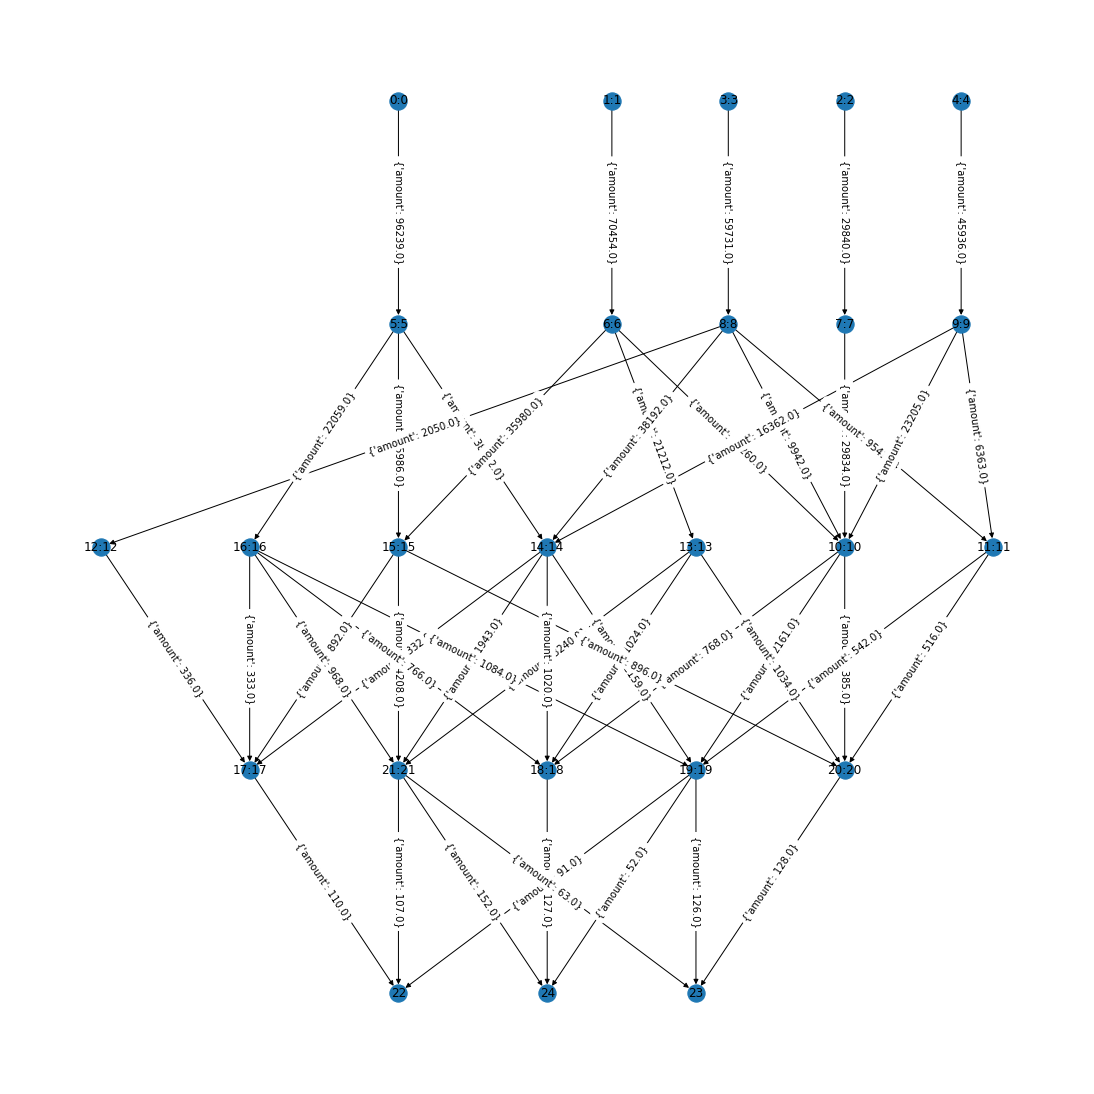

In [37]:
plt.figure(figsize=(15, 15))
#nx.draw_kamada_kawai(G, arrows=True)
pos = graphviz_layout(G, prog='dot')
nx.draw(G, pos, with_labels=True, arrows=True)
nx.draw_networkx_edge_labels(G, pos)
plt.show()

# Balance

In [38]:
balance_df = econ_sim.read_tick_log_to_df(open("/tmp/balance.log", "rb"), index_name="agent", column_names=["balance"])
balance_df.reset_index(inplace=True)

In [39]:
balance_df[balance_df["tick"] == balance_df["tick"].min()].set_index("agent")

,tick,balance
agent,,
0,0,5.385592e+02
1,0,8.667444e+02
2,0,3.080451e+02
3,0,8.886220e+02
4,0,3.180171e+02
5,0,1.000000e+03
6,0,1.200000e+03
7,0,4.000000e+02
8,0,2.000000e+03


In [40]:
balance_df[balance_df["tick"] == balance_df["tick"].max()].set_index("agent")

,tick,balance
agent,,
0,99999,1.869491e+05
1,99999,2.487233e+04
2,99999,5.098641e+03
3,99999,1.980763e+04
4,99999,6.872432e+03
5,99999,5.793342e+06
6,99999,1.776204e+05
7,99999,1.025915e+04
8,99999,1.128978e+05


<AxesSubplot:xlabel='tick'>

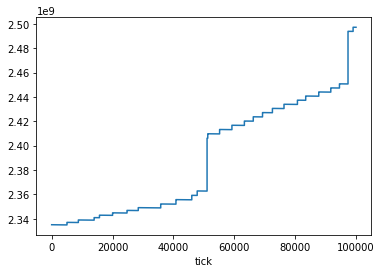

In [41]:
balance_df.groupby("tick")["balance"].sum().plot()

In [42]:
balance_df[balance_df["tick"] == balance_df["tick"].min()]["balance"].describe()

count    2.500000e+01
mean     9.340249e+07
std      4.112925e+08
min      3.080451e+02
25%      8.886220e+02
50%      1.315000e+04
75%      8.993500e+05
max      2.053687e+09
Name: balance, dtype: float64

In [43]:
balance_df[balance_df["tick"] == balance_df["tick"].max()]["balance"].describe()

count    2.500000e+01
mean     9.988547e+07
std      4.080952e+08
min      5.098641e+03
25%      2.487233e+04
50%      7.150393e+05
75%      6.772391e+06
max      2.035834e+09
Name: balance, dtype: float64

In [44]:
ltb_df = balance_df[balance_df["tick"] == balance_df["tick"].max()]

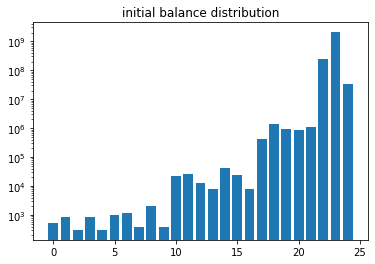

In [45]:
plt.bar(balance_df[balance_df["tick"] == balance_df["tick"].min()]["agent"], balance_df[balance_df["tick"] == balance_df["tick"].min()]["balance"])
plt.title("initial balance distribution")
plt.yscale("log")

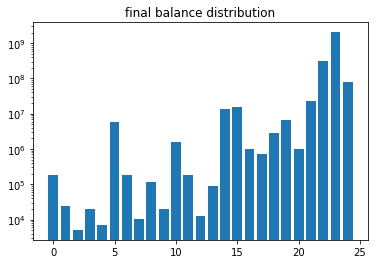

In [46]:
plt.bar(balance_df[balance_df["tick"] == balance_df["tick"].max()]["agent"], balance_df[balance_df["tick"] == balance_df["tick"].max()]["balance"])
plt.title("final balance distribution")
plt.yscale("log")

In [47]:
balance_df[balance_df["tick"] == balance_df["tick"].max()].set_index("agent")["balance"]-balance_df[balance_df["tick"] == balance_df["tick"].min()].set_index("agent")["balance"]

agent
0     1.864105e+05
1     2.400559e+04
2     4.790596e+03
3     1.891901e+04
4     6.554415e+03
5     5.792342e+06
6     1.764204e+05
7     9.859151e+03
8     1.108978e+05
9     1.914724e+04
10    1.567489e+06
11    1.558916e+05
12   -5.460850e+02
13    7.946834e+04
14    1.344095e+07
15    1.552292e+07
16    9.717321e+05
17    2.972393e+05
18    1.562391e+06
19    5.835041e+06
20    1.020749e+05
21    2.219028e+07
22    6.332574e+07
23   -1.785264e+07
24    4.852713e+07
Name: balance, dtype: float64

In [48]:
balance_df[balance_df["tick"] == balance_df["tick"].max()].set_index("agent")["balance"]

agent
0     1.869491e+05
1     2.487233e+04
2     5.098641e+03
3     1.980763e+04
4     6.872432e+03
5     5.793342e+06
6     1.776204e+05
7     1.025915e+04
8     1.128978e+05
9     1.954724e+04
10    1.590189e+06
11    1.826416e+05
12    1.260391e+04
13    8.766834e+04
14    1.348400e+07
15    1.554722e+07
16    9.794321e+05
17    7.150393e+05
18    2.932841e+06
19    6.772391e+06
20    1.001425e+06
21    2.325193e+07
22    3.067254e+08
23    2.035834e+09
24    8.166238e+07
Name: balance, dtype: float64

In [49]:
balance_df[balance_df["tick"] == balance_df["tick"].max()].head(50)

,agent,tick,balance
2499975,0,99999,1.869491e+05
2499976,1,99999,2.487233e+04
2499977,2,99999,5.098641e+03
2499978,3,99999,1.980763e+04
2499979,4,99999,6.872432e+03
2499980,5,99999,5.793342e+06
2499981,6,99999,1.776204e+05
2499982,7,99999,1.025915e+04
2499983,8,99999,1.128978e+05
2499984,9,99999,1.954724e+04


<AxesSubplot:>

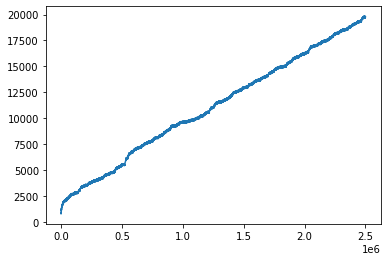

In [50]:
balance_df[balance_df["agent"] == 3]["balance"].plot()

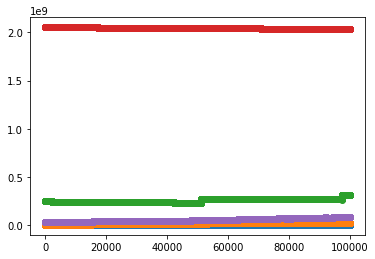

In [114]:
for agent in balance_df["agent"].unique():
    plt.scatter(balance_df[balance_df["agent"] == agent]["tick"], balance_df[balance_df["agent"] == agent]["balance"])


In [119]:
balance_df[balance_df["tick"] == balance_df["tick"].max()].drop("tick", axis=1).set_index("agent") / balance_df[balance_df["tick"] == balance_df["tick"].min()].drop("tick", axis=1).set_index("agent")

,balance
agent,
0,347.128236
1,28.696272
2,16.551604
3,22.290280
4,21.610257
5,5793.342045
6,148.017026
7,25.647878
8,56.448891


# Inventory

In [51]:
#columns = list(map(lambda x: str(x), range(production_chain_df.shape[0])))
columns=None
inventory_df = econ_sim.read_tick_log_to_df(open("/tmp/inventory.log", "rb"), index_name="agent", column_names=columns)
inventory_df.reset_index(inplace=True)

## Last Tick Inventory

In [52]:
inventory_df[inventory_df["tick"] == inventory_df["tick"].max()]

,agent,tick,0,1,2,3,4,5,6,7,...,15,16,17,18,19,20,21,22,23,24
2499975,0,99999,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2499976,1,99999,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2499977,2,99999,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2499978,3,99999,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2499979,4,99999,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2499980,5,99999,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2499981,6,99999,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2499982,7,99999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2499983,8,99999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2499984,9,99999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Produced Goods Inventory

In [53]:
agent_goods_df * inventory_df[inventory_df["tick"] == inventory_df["tick"].max()].set_index("agent")

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,tick
0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


### Input Resources Inventory

In [54]:
inventory_df[inventory_df["tick"] == inventory_df["tick"].max()].set_index("agent") - agent_goods_df * inventory_df[inventory_df["tick"] == inventory_df["tick"].max()].set_index("agent")

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,tick
agent,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [55]:
(inventory_df[inventory_df["tick"] == inventory_df["tick"].max()].set_index("agent") - agent_goods_df * inventory_df[inventory_df["tick"] == inventory_df["tick"].max()].set_index("agent")) - (agent_goods_df @ production_chain_df.T)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,tick
agent,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
7,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
8,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


## Production Surplus/Deficit

In [96]:
agent_id = 23
inv_s = inventory_df[inventory_df["tick"] == inventory_df["tick"].max()].set_index("agent").loc[agent_id].drop("tick")
need_s = (agent_goods_df.loc[agent_id] @ production_chain_df.T)
batch_s = (agent_goods_df * production_chain.batch_sizes[np.newaxis,:]).loc[agent_id] @ production_chain_df.T
deficit_df = pd.DataFrame({"inventory":inv_s, "unit_need":need_s, "batch_need": batch_s, "surplus":inv_s - batch_s, "batches":inv_s/batch_s})
deficit_df

,inventory,unit_need,batch_need,surplus,batches
0,0.0,0.0,0.0,0.0,NaN
1,0.0,0.0,0.0,0.0,NaN
2,0.0,0.0,0.0,0.0,NaN
3,0.0,0.0,0.0,0.0,NaN
4,0.0,0.0,0.0,0.0,NaN
5,0.0,0.0,0.0,0.0,NaN
6,0.0,0.0,0.0,0.0,NaN
7,0.0,0.0,0.0,0.0,NaN
8,0.0,0.0,0.0,0.0,NaN
9,0.0,0.0,0.0,0.0,NaN


In [97]:
balance_df[(balance_df["agent"] == agent_id) & (balance_df["tick"] == balance_df["tick"].max())]

,agent,tick,balance
2499998,23,99999,2.035834e+09


In [98]:
buy_budget_df[(buy_budget_df["tick"] == buy_budget_df["tick"].max()) & (buy_budget_df["agent"] == agent_id)].T

,2499998
agent,2.300000e+01
tick,9.999900e+04
0,0.000000e+00
1,0.000000e+00
2,0.000000e+00
3,0.000000e+00
4,0.000000e+00
5,0.000000e+00
6,0.000000e+00
7,0.000000e+00


In [99]:
inventory_df[inventory_df["agent"] == agent_id].drop("agent", axis=1).set_index("tick")[agent_id].describe()

count    100000.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: 23, dtype: float64

# Buy and Sell Prices

In [60]:
max_last_buy_price = buy_price_df[buy_price_df["tick"] == buy_price_df["tick"].max()].drop(["agent", "tick"], axis=1).max(axis=0)
min_last_sell_price = sell_price_df[sell_price_df["tick"] == sell_price_df["tick"].max()].drop(["agent", "tick"], axis=1).min(axis=0)
#max_last_buy_price - min_last_sell_price
min_last_sell_price

0     7.292482e+00
1     1.349469e+01
2     4.195489e+00
3     1.613780e+01
4     3.198285e+00
5     1.372535e+01
6     1.359311e+01
7     4.268648e+00
8     1.906884e+01
9     3.233223e+00
10    2.256354e+02
11    1.664811e+02
12    9.843410e+01
13    5.781266e+01
14    1.441716e+03
15    7.033006e+02
16    3.698535e+02
17    1.015010e+04
18    1.284070e+04
19    3.281312e+04
20    7.544817e+03
21    9.608942e+04
22    4.297887e+07
23    2.739797e+08
24    3.384695e+06
dtype: float64

## Market Analysis for one Good

In [145]:
product_id = 19
min_ticks = 0
max_ticks = np.inf

df1 = sell_price_df[(sell_price_df[product_id] < np.inf) & (sell_price_df["tick"].between(min_ticks,max_ticks))].groupby("tick")[product_id].min().to_frame().reset_index()
dfms = min_sell_price_df[(min_sell_price_df[product_id] < np.inf) & (min_sell_price_df["tick"].between(min_ticks, max_ticks))].groupby("tick")[product_id].min().to_frame().reset_index()
df2 = buy_price_df[(buy_price_df["tick"].between(min_ticks, max_ticks)) & (buy_price_df[product_id] > 0)][["tick", "agent", product_id]]
dfmb = max_buy_price_df[(max_buy_price_df["tick"].between(min_ticks, max_ticks)) & (max_buy_price_df[product_id] > 0)][["tick", "agent", product_id]]

buyer_df = buy_budget_df[buy_budget_df[product_id] > 0][["tick", "agent", product_id]].merge(df2, on=["tick", "agent"], suffixes=["_budget", "_price"])
buyer_df["units"] = buyer_df[f'{product_id}_budget'] / buyer_df[f'{product_id}_price']
seller_df = inventory_df[inventory_df["agent"].isin(np.where(agent_goods_df[product_id])[0])].groupby("tick")[product_id].sum()
seller_df = seller_df.loc[min_ticks:max_ticks]


5.0


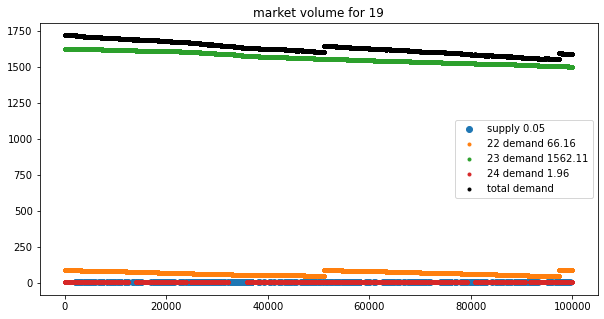

In [146]:
colors = plt.rcParams['axes.prop_cycle'].by_key()["color"]
plt.figure(figsize=(10,5))
plt.scatter(seller_df[seller_df>0].index, seller_df[seller_df>0], label=f'supply {seller_df.mean():.2f}')
for agent_id, color in zip(buyer_df["agent"].unique(), colors[1:]):
    plt.scatter(buyer_df[buyer_df["agent"] == agent_id]["tick"], buyer_df[buyer_df["agent"] == agent_id]["units"], label=f'{agent_id} demand {buyer_df[buyer_df["agent"] == agent_id]["units"].mean():.2f}', marker=".")
total_demand = buyer_df.groupby("tick")["units"].sum()
plt.scatter(total_demand.index, total_demand, label="total demand", marker=".", color="black")
plt.legend(loc="right")
plt.title(f'market volume for {product_id}')
print(seller_df.max())

Text(0.5, 1.0, 'price chart for 19')

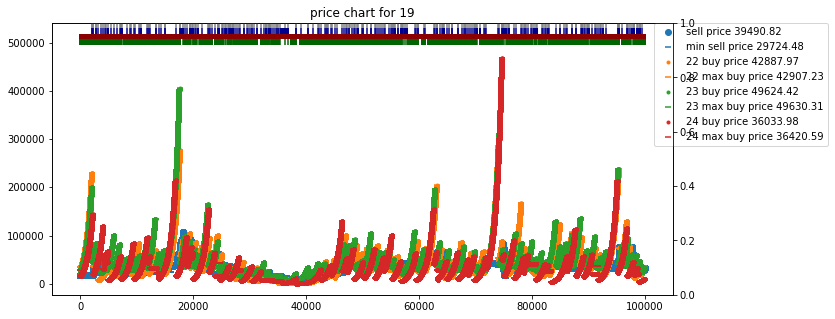

In [147]:
colors = plt.rcParams['axes.prop_cycle'].by_key()["color"]
plt.figure(figsize=(15,5))
plt.scatter(df1["tick"], df1[product_id], label=f'sell price {df1[product_id].mean():.2f}', color=colors[0])
plt.scatter(dfms["tick"], dfms[product_id], label=f'min sell price {dfms[product_id].mean():.2f}', marker="_", color=colors[0])
for agent, color in zip(df2["agent"].unique(), colors[1:]):
    plt.scatter(df2[df2["agent"] == agent]["tick"], df2[df2["agent"] == agent][product_id], label=f'{agent} buy price {df2[df2["agent"] == agent][product_id].mean():.2f}', marker=".", color=color)
    plt.scatter(dfmb[dfmb["agent"] == agent]["tick"], dfmb[dfmb["agent"] == agent][product_id], label=f'{agent} max buy price {dfmb[dfmb["agent"] == agent][product_id].mean():.2f}', marker="_", color=color)
plt.ylim(plt.ylim()[0], plt.ylim()[1]*1.1)

#plt.legend(loc="right")
plt.legend(bbox_to_anchor=(1.25, 1), borderaxespad=0)

# some status indicators
ax2 = plt.twinx()
ax2.vlines(transaction_df[(transaction_df["product"] == product_id) & transaction_df["tick"].between(min_ticks, max_ticks)]["tick"], ymin=0.98, ymax=1, color="gray")
ax2.vlines(seller_df[seller_df>0].index, ymin=0.96, ymax=0.98, color="darkblue")
ax2.vlines((buyer_df.groupby("tick")["units"].sum() > 0).index, ymin=0.94, ymax=0.96, color="darkred")
ax2.vlines(df1[(df2.groupby("tick")[product_id].max() - df1[product_id])>0].index, ymin=0.92, ymax=0.94, color="darkgreen")
ax2.set_ylim(0,1)
plt.subplots_adjust(right=0.7)

plt.title(f'price chart for {product_id}')

#plt.tight_layout(rect=[0, 0, 0.75, 1])



(0.0, 2154789192.043546)

<Figure size 432x288 with 0 Axes>

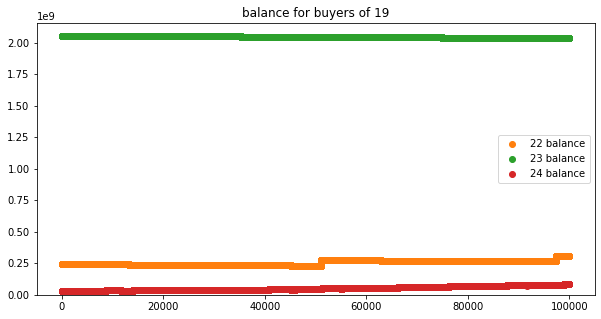

In [148]:
plt.subplots_adjust(right=0.7)
colors = plt.rcParams['axes.prop_cycle'].by_key()["color"]
plt.figure(figsize=(10,5))
for agent, color in zip(df2["agent"].unique(), colors[1:]):
    plt.scatter(balance_df[balance_df["agent"] == agent]["tick"], balance_df[balance_df["agent"] == agent]["balance"], color=color, label=f'{agent} balance')
plt.title(f'balance for buyers of {product_id}')
plt.legend(loc="right")
plt.ylim(0)

In [149]:
transaction_df[transaction_df["product"] == product_id].groupby("buyer")["amount"].sum()

buyer
22     91.0
23    126.0
24     52.0
Name: amount, dtype: float64

In [150]:
transaction_df[transaction_df["product"] == product_id].groupby("buyer")["tick"].describe()

,count,mean,std,min,25%,50%,75%,max
buyer,,,,,,,,
22,87.0,51906.482759,29705.551677,2103.0,25564.50,53498.0,78522.00,99268.0
23,120.0,49503.883333,27642.883555,2124.0,27709.25,46137.5,71054.25,99598.0
24,52.0,51014.384615,29681.092265,2280.0,23646.25,52983.5,75531.25,98773.0


In [151]:
transaction_df[transaction_df["product"] == product_id].groupby("buyer")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
buyer,,,,,,,,
22,87.0,57366.086637,30456.040420,9682.161754,39890.157983,52896.577339,66220.810124,172622.665570
23,120.0,51786.161831,31551.294488,11587.275753,30590.876180,47327.761110,63692.286769,235580.499512
24,52.0,62511.211711,38132.640354,11059.553562,44392.257346,53143.908875,67665.473418,270343.811497


### Buy/Sell Price Investigation

In [67]:
df1[product_id].describe()

count    51.000000
mean      4.671761
std       0.825091
min       3.821672
25%       4.068799
50%       4.297720
75%       5.567754
max       7.000000
Name: 4, dtype: float64

In [68]:
df2.groupby("agent")[product_id].describe()

,count,mean,std,min,25%,50%,75%,max
agent,,,,,,,,
9,51.0,6.918441,0.063474,6.869862,6.869862,6.869862,7.0,7.0


In [69]:
df2[df2["tick"] == df2["tick"].max()][product_id].max() - df1[product_id].iloc[-1]

3.048190414339073

In [70]:
(df2.groupby("tick")[product_id].max() - df1.set_index("tick")[product_id]).describe()

count    51.000000
mean      2.246680
std       0.769751
min       0.000000
25%       1.432246
50%       2.581193
75%       2.801063
max       3.048190
Name: 4, dtype: float64

In [71]:
dfmb[dfmb["tick"] == dfmb["tick"].max()][product_id].max() - dfms[product_id].iloc[-1]

3.6980562348109136

In [72]:
(dfmb.groupby("tick")[product_id].max() - dfms.set_index("tick")[product_id]).describe()

count    51.000000
mean      4.227171
std       1.241018
min       3.671577
25%       3.698056
50%       3.698056
75%       4.811556
max      12.122423
Name: 4, dtype: float64

In [73]:
bp_s = (production_goods.loc[product_id] * buy_price_df[buy_price_df["agent"] == product_id].drop(["agent", "tick"], axis=1)).sum(axis=1)
mbp_s = (production_goods.loc[product_id] * max_buy_price_df[max_buy_price_df["agent"] == product_id].drop(["agent", "tick"], axis=1)).sum(axis=1)
sp_s = sell_price_df[sell_price_df["agent"] == product_id].drop(["agent", "tick"], axis=1).min(axis=1)
msp_s = min_sell_price_df[min_sell_price_df["agent"] == product_id].drop(["agent", "tick"], axis=1).min(axis=1)
price_df = pd.DataFrame({"cost":bp_s, "max_cost":mbp_s, "price":sp_s, "min_price":msp_s, "unit_profit":sp_s-bp_s})
price_df

,cost,max_cost,price,min_price,unit_profit
4,0.0,0.0,7.000000,3.198285,7.000000
29,0.0,0.0,6.965000,3.198285,6.965000
54,0.0,0.0,5.572000,3.198285,5.572000
79,0.0,0.0,5.599563,3.198285,5.599563
104,0.0,0.0,5.602063,3.198285,5.602063
...,...,...,...,...,...
2499879,0.0,0.0,3.198285,3.198285,3.198285
2499904,0.0,0.0,3.198285,3.198285,3.198285
2499929,0.0,0.0,3.198285,3.198285,3.198285
2499954,0.0,0.0,3.198285,3.198285,3.198285


## Larger Scale Market Analysis

In [127]:
demand_units_df = (buy_budget_df.set_index(["agent", "tick"]) / buy_price_df.set_index(["agent", "tick"])).fillna(0.)
supply_units_df = (inventory_df.drop("tick", axis=1).set_index("agent") * agent_goods_df).rename_axis('agent').reset_index(level=0)
supply_units_df["tick"] = inventory_df["tick"]

In [128]:
demand_units_df.groupby("tick").sum().mean() - supply_units_df.groupby("tick").sum().mean()

0          -8.31952
1         -10.56468
2         -11.73053
3         -11.49760
4         -13.16722
5          19.57238
6          10.80448
7           2.40736
8          14.71822
9          14.44226
10         19.14703
11          6.13667
12         -2.30014
13         18.85638
14         24.66725
15         25.10684
16         16.15941
17         66.03490
18          6.16239
19       1629.97645
20       1061.29679
21        855.27758
22         -0.00002
23          0.00000
24         -0.00025
agent           NaN
dtype: float64

In [129]:
(demand_units_df.groupby("tick").sum()).std()/(demand_units_df.groupby("tick").sum()).mean()

0     0.215530
1     0.702191
2     1.573180
3     0.897854
4     1.089813
5     0.396443
6     0.486232
7     0.830836
8     0.491104
9     0.366547
10    0.351370
11    0.448904
12    0.861955
13    0.409593
14    0.404635
15    0.473592
16    0.342545
17    0.247147
18    0.346016
19    0.027658
20    0.032567
21    0.034431
22         NaN
23         NaN
24         NaN
dtype: float64

In [130]:
(supply_units_df.groupby("tick").sum()).std()/(supply_units_df.groupby("tick").sum()).mean()

agent      0.600928
0          4.929493
1          5.034018
2          5.006180
3          5.037691
4          5.030782
5          5.982045
6          6.102144
7          5.323233
8          5.747628
9          5.573222
10        19.319960
11         9.927061
12         5.046484
13         5.792659
14        17.337327
15        16.382435
16        11.262170
17         8.847210
18         9.550961
19        32.505280
20         9.536126
21        34.980167
22       223.605680
23              NaN
24        63.237963
dtype: float64

# Profit Analysis

In [79]:
revenue = transaction_df.groupby("seller")["value"].sum()
costs = transaction_df.groupby("buyer")["value"].sum()

In [80]:
costs

buyer
5     7.777045e+05
6     9.628313e+05
7     1.299924e+05
8     9.828462e+05
9     1.534868e+05
10    6.217342e+05
11    1.971716e+05
12    3.570131e+04
13    3.456061e+05
14    3.761170e+06
15    3.117620e+06
16    1.036524e+06
17    2.222453e+06
18    3.574141e+06
19    9.063435e+06
20    1.595599e+06
21    2.439781e+07
22    2.328100e+07
23    1.785264e+07
24    2.970682e+07
Name: value, dtype: float64

In [81]:
revenue

seller
0     7.777045e+05
1     9.628313e+05
2     1.299924e+05
3     9.828462e+05
4     1.534868e+05
5     6.570047e+06
6     1.139252e+06
7     1.398515e+05
8     1.093744e+06
9     1.726341e+05
10    2.189223e+06
11    3.530631e+05
12    3.515523e+04
13    4.250744e+05
14    1.720212e+07
15    1.864054e+07
16    2.008257e+06
17    2.519692e+06
18    5.136533e+06
19    1.489848e+07
20    1.697674e+06
21    4.658809e+07
Name: value, dtype: float64

In [82]:
revenue-costs

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
5     5.792342e+06
6     1.764204e+05
7     9.859151e+03
8     1.108978e+05
9     1.914724e+04
10    1.567489e+06
11    1.558916e+05
12   -5.460850e+02
13    7.946834e+04
14    1.344095e+07
15    1.552292e+07
16    9.717321e+05
17    2.972393e+05
18    1.562391e+06
19    5.835041e+06
20    1.020749e+05
21    2.219028e+07
22             NaN
23             NaN
24             NaN
Name: value, dtype: float64

In [83]:
balance_df[balance_df["tick"] == balance_df["tick"].max()].set_index("agent") - balance_df[balance_df["tick"] == balance_df["tick"].min()].set_index("agent")

,tick,balance
agent,,
0,99999,1.864105e+05
1,99999,2.400559e+04
2,99999,4.790596e+03
3,99999,1.891901e+04
4,99999,6.554415e+03
5,99999,5.792342e+06
6,99999,1.764204e+05
7,99999,9.859151e+03
8,99999,1.108978e+05


# Production Efficiency

In [84]:
production_efficiency_df = econ_sim.read_tick_log_to_df(open("/tmp/production_efficiency.log", "rb"), index_name="agent")

In [85]:
production_efficiency_df.reset_index()[production_efficiency_df.reset_index()["agent"] == 4][4].describe()

count    100000.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: 4, dtype: float64

In [86]:
production_efficiency_df.reset_index()[production_efficiency_df.reset_index()["agent"] == 4][["tick",4]].head(50)

,tick,4
4,0,0.0
29,1,0.0
54,2,0.0
79,3,0.0
104,4,0.0
129,5,0.0
154,6,0.0
179,7,0.0
204,8,0.0
229,9,0.0


In [87]:
balance_df[balance_df["agent"] == 4].head(50)

,agent,tick,balance
4,4,0,318.017145
29,4,1,331.982145
54,4,2,303.087005
79,4,3,309.386787
104,4,4,315.687818
129,4,5,321.990099
154,4,6,328.293631
179,4,7,334.598412
204,4,8,340.904444
229,4,9,347.211725


In [88]:
production_efficiency_df.index.to_frame()["tick"]

agent  tick 
0      0            0
1      0            0
2      0            0
3      0            0
4      0            0
                ...  
20     99999    99999
21     99999    99999
22     99999    99999
23     99999    99999
24     99999    99999
Name: tick, Length: 2500000, dtype: int64

<AxesSubplot:xlabel='tick'>

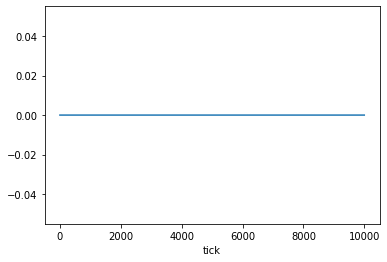

In [89]:
production_efficiency_df[production_efficiency_df.index.to_frame()["tick"] < 10000].groupby("tick").max()[4].plot()

(0.0, 21.260995916246074)

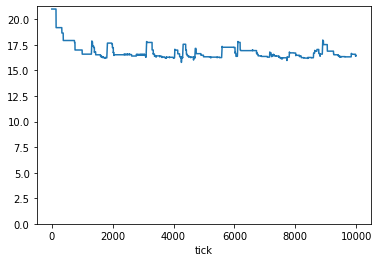

In [90]:
buy_price_df[(buy_price_df["tick"] < 10000)].groupby("tick")[3].max().plot()
plt.ylim(0)

<AxesSubplot:xlabel='tick'>

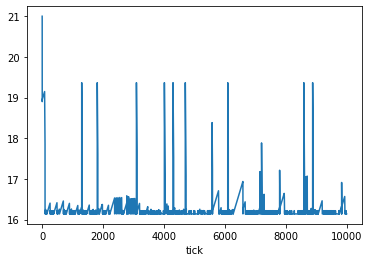

In [91]:
sell_price_df[(sell_price_df["tick"] < 10000)].groupby("tick")[3].min().plot()

In [92]:
sell_price_df.groupby("tick")[3].min().describe()

count    100000.000000
mean         16.268061
std           0.344152
min          16.137805
25%          16.137805
50%          16.147805
75%          16.260305
max          21.000000
Name: 3, dtype: float64

<AxesSubplot:xlabel='tick'>

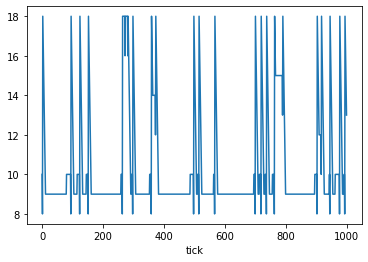

In [93]:
inventory_df[(inventory_df["tick"] < 1000) & (inventory_df["agent"] == 3)].groupby("tick")[3].max().plot()

<AxesSubplot:xlabel='tick'>

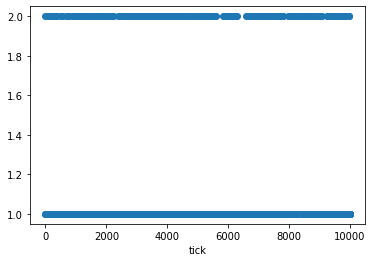

In [94]:
transaction_df[(transaction_df["tick"] < 10000) & (transaction_df["seller"] == 3)].groupby("tick")["amount"].sum().plot(marker="o", linestyle='none')

In [95]:
transaction_df[(transaction_df["tick"] < 10000) & (transaction_df["seller"] == 3)]

,tick,seller,buyer,product,amount,price,value
0,1,3,8,3,2.0,20.947500,41.895000
5,2,3,8,3,1.0,19.950000,19.950000
15,3,3,8,3,1.0,19.977500,19.977500
25,4,3,8,3,1.0,19.978750,19.978750
35,5,3,8,3,1.0,19.980000,19.980000
...,...,...,...,...,...,...,...
59420,9987,3,8,3,1.0,16.293216,16.293216
59425,9988,3,8,3,1.0,16.294466,16.294466
59430,9989,3,8,3,1.0,16.295716,16.295716
59436,9990,3,8,3,1.0,16.296966,16.296966
